In [1]:
# use all you've learned

In [2]:
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#load dataset
df = pd.read_csv(r"C:\Users\Admin\OneDrive\Desktop\Data Analysis And Automation\Sample Data\data_jobs.csv")
df.head()

# cleaning the dataset
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [ ]:
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()


In [ ]:
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month
# Explode job_skills
df_DA_explode = df_DA.explode('job_skills')
#pivot the data
df_DA_pivot = df_DA_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)
# create a new row for total counts
df_DA_pivot.loc['Total'] =df_DA_pivot.sum()

df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]

# drop the total row for plotting
df_DA_pivot = df_DA_pivot.drop('Total')

df_DA_pivot

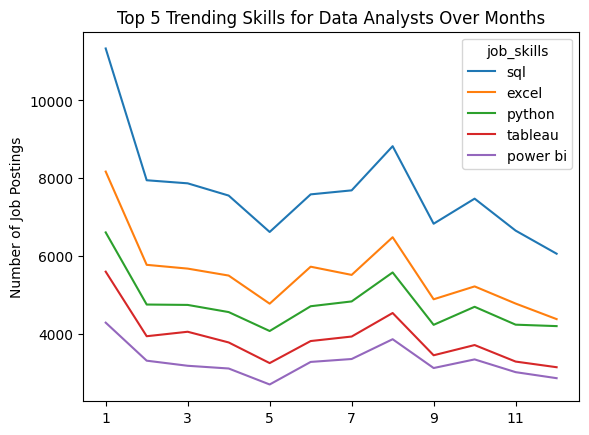

In [ ]:
df_DA_pivot.iloc[:, :5].plot(kind='line')
plt.title('Top 5 Trending Skills for Data Analysts Over Months')
plt.xlabel('')
plt.ylabel('Number of Job Postings')
plt.show()